## 1. This is a Jupyter Notebook!
<p>A <em>Jupyter Notebook</em> is a document that contains text cells (what you're reading right now) and code cells. What is special with a notebook is that it's <em>interactive</em>: You can change or add code cells, and then <em>run</em> a cell by first selecting it and then clicking the <em>run cell</em> button above ( <strong>▶|</strong> Run ) or hitting <code>Ctrl + Enter</code>. </p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_33/datasets/run_code_cell_image.png" alt=""></p>
<p>The result will be displayed directly in the notebook. You <em>could</em> use a notebook as a simple calculator. For example, it's estimated that on average 256 children were born every minute in 2016. The code cell below calculates how many children were born on average on a day. </p>

In [1]:
# I'm a code cell, click me, then run me!
256 * 60 * 24 # Children × minutes × hours

368640

## 2. Put any code in code cells
<p>But a code cell can contain much more than a simple one-liner! This is a notebook running Python and you can put <em>any</em> Python code in a code cell (but notebooks can run other languages too, like R). Below is a code cell where we define a whole new function (<code>greet</code>). To show the output of <code>greet</code> we run it last in the code cell as the last value is always printed out.</p>

In [2]:
def greet(first_name, last_name):
    greeting = 'My name is ' + last_name + ', ' + first_name + ' ' + last_name + '!'
    return greeting

# Replace with your first and last name.
# That is, unless your name is already Jane Bond.
greet('Jane', 'Bond')

'My name is Bond, Jane Bond!'

## 3. Jupyter Notebooks ♡ SQL (part i)
<p>We've seen that notebooks can display basic objects such as numbers and strings. But notebooks also support and display the outputs of SQL commands! Using an open source Jupyter extension called <a href="https://github.com/catherinedevlin/ipython-sql">ipython-sql</a>, we can connect to a database and issue SQL commands within our notebook. For example, we can connect to a <a href="https://www.postgresql.org/">PostgreSQL</a> database that has a table that contains country data, then inspect the first three rows of the table by putting <code>%%sql</code> ahead of the SQL commands (more on the meaning of <code>%%</code> later).</p>

In [3]:
%%sql postgresql:///countries
SELECT * FROM countries LIMIT 3;

3 rows affected.


code,name,continent,region,surface_area,indep_year,local_name,gov_form,capital,cap_long,cap_lat
AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919,Afganistan/Afqanestan,Islamic Emirate,Kabul,69.1761,34.5228
NLD,Netherlands,Europe,Western Europe,41526.0,1581,Nederland,Constitutional Monarchy,Amsterdam,4.89095,52.3738
ALB,Albania,Europe,Southern Europe,28748.0,1912,Shqiperia,Republic,Tirane,19.8172,41.3317


## 4. Jupyter Notebooks ♡ SQL (part ii)
<p>And after the first connection to the database, the connection code (<code>postgresql:///countries</code>) can be omitted. Let's do a different query this time and select the row in the <code>countries</code> table for Belgium. Note the single <code>%</code> this time. Again, more on that later.</p>

In [4]:
%%sql postgresql:///countries
SELECT * FROM countries
WHERE name='Belgium';

1 rows affected.


code,name,continent,region,surface_area,indep_year,local_name,gov_form,capital,cap_long,cap_lat
BEL,Belgium,Europe,Western Europe,30518.0,1830,Belgie/Belgique,"Constitutional Monarchy, Federation",Brussels,4.36761,50.8371


## 5. Jupyter Notebooks ♡ SQL (part iii)
<p>We can even convert our SQL results to a pandas DataFrame! Let's convert the entire <code>countries</code> table.</p>

In [5]:
# SQL Query
result = %sql SELECT * FROM countries;

# To pandas DataFrame
df = result.DataFrame()
df.info()

 * postgresql:///countries
206 rows affected.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 11 columns):
code            206 non-null object
name            206 non-null object
continent       206 non-null object
region          206 non-null object
surface_area    206 non-null float64
indep_year      188 non-null float64
local_name      206 non-null object
gov_form        206 non-null object
capital         201 non-null object
cap_long        204 non-null float64
cap_lat         204 non-null float64
dtypes: float64(4), object(7)
memory usage: 17.8+ KB


## 6. Jupyter Notebooks ♡ SQLAlchemy
<p>If SQLAlchemy is your thing, you can do that in this notebook, too! Jupyter Notebooks love everything, apparently...</p>
<p>What's <a href="https://www.sqlalchemy.org/">SQLAlchemy</a>, you ask? SQLAlchemy is the Python SQL toolkit and Object Relational Mapper that gives application developers the full power and flexibility of SQL. Next, we'll run the last query we just ran except after connecting to and querying the database using SQLAlchemy.</p>

In [6]:
# Connect to database
from sqlalchemy import create_engine
engine = create_engine("postgresql:///countries");

# Query database
result = engine.execute("SELECT * FROM countries;")

# Display column names
result.keys()

['code',
 'name',
 'continent',
 'region',
 'surface_area',
 'indep_year',
 'local_name',
 'gov_form',
 'capital',
 'cap_long',
 'cap_lat']

## 7. Jupyter Notebooks ♡ plots
<p>Tables are nice but — as the saying goes — <em>"a plot can show a thousand data points."</em> Notebooks handle plots as well, but it requires some more magic. Here <em>magic</em> does not refer to any arcane rituals but to so-called "magic commands" that affect how the Jupyter Notebook works. Magic commands start with either <code>%</code> or <code>%%</code> (just like we saw with <code>%sql</code> and <code>%%sql</code>) and the command we need to nicely display plots inline is <code>%matplotlib inline</code>. With this <em>magic</em> in place, all plots created in code cells will automatically be displayed inline.</p>
<p>Using the previously created pandas DataFrame that we named <code>df</code>, let's plot the number of countries in each continent as a bar chart using the <code>plot()</code> method of pandas DataFrames.</p>
<p><em>Now, for the difference between <code>%%sql</code> and <code>%sql</code>: ordinary assignment works for single-line <code>%sql</code> queries while <code>%%sql</code> is for multi-line queries. See the <a href="https://github.com/catherinedevlin/ipython-sql#assignment">Assignment</a> ipython-sql documentation section for more info.</em></p>

In [7]:
df

,code,name,continent,region,surface_area,indep_year,local_name,gov_form,capital,cap_long,cap_lat
0,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,Afganistan/Afqanestan,Islamic Emirate,Kabul,69.176100,34.522800
1,NLD,Netherlands,Europe,Western Europe,41526.0,1581.0,Nederland,Constitutional Monarchy,Amsterdam,4.890950,52.373800
2,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,Shqiperia,Republic,Tirane,19.817200,41.331700
3,DZA,Algeria,Africa,Northern Africa,2381740.0,1962.0,Al-Jazair/Algerie,Republic,Algiers,3.050970,36.739700
4,ASM,American Samoa,Oceania,Polynesia,199.0,NaN,Amerika Samoa,US Territory,Pago Pago,-170.691000,-14.284600
5,AND,Andorra,Europe,Southern Europe,468.0,1278.0,Andorra,Parliamentary Coprincipality,Andorra la Vella,1.521800,42.507500
6,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,Angola,Republic,Luanda,13.242000,-8.811550
7,ATG,Antigua and Barbuda,North America,Caribbean,442.0,1981.0,Antigua and Barbuda,Constitutional Monarchy,Saint John's,-61.845600,17.117500
8,ARE,United Arab Emirates,Asia,Middle East,83600.0,1971.0,Al-Imarat al-´Arabiya al-Muttahida,Emirate Federation,Abu Dhabi,54.370500,24.476400
9,ARG,Argentina,South America,South America,2780400.0,1816.0,Argentina,Federal Republic,Buenos Aires,-58.417300,-34.611800


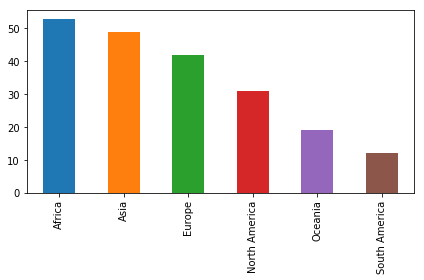

In [8]:
# Setting up inline plotting using Jupyter Notebook "magic"
%matplotlib inline

# Plotting number of countries in each continent
df.continent.value_counts().plot(kind='bar')

## 8. Goodbye for now!
<p>Tables and plots are the most common outputs when doing data analysis, but Jupyter Notebooks can render many more types of outputs such as sound, animation, video, etc. Yes, almost anything that can be shown in a modern web browser. This also makes it possible to include interactive widgets directly in the notebook! Everything in this collection of <a href="http://jupyter.org/widgets">Jupyter Widgets</a> can be displayed in this notebook.</p>
<p>But that's enough for now! This was just a short introduction to Jupyter Notebooks, an open source technology that is increasingly used for data science and analysis. We hope you enjoyed it! :)</p>